In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

In [144]:
data = pd.read_csv("students_data.csv")

data.tail(10)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1034,990885,Math,GP,M,16,U,LE3,T,2,1,at_home,other,course,mother,1,1,1,no,no,no,yes,yes,yes,no,yes,4,4,4,3,5,5,6,12,13,14
1035,990942,Math,GP,F,16,U,LE3,T,4,3,teacher,services,course,mother,3,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,3,1,2,1,2,16,15,15
1036,993398,Por,GP,F,16,U,GT3,A,3,1,services,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,3,3,2,2,4,2,11,11,12
1037,995838,Por,MS,F,15,R,GT3,T,3,3,services,other,reputation,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,5,4,1,1,1,4,13,12,12
1038,996164,Por,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
1039,997832,Math,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,2,no,yes,yes,yes,yes,yes,yes,yes,4,2,1,2,3,3,8,10,10,10
1040,997897,Por,GP,M,15,R,GT3,T,2,1,health,services,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,4,2,1,1,5,4,10,9,10
1041,998425,Por,MS,F,16,R,LE3,T,1,1,at_home,other,course,father,3,2,0,no,yes,no,no,yes,yes,no,no,5,3,2,1,1,1,0,16,17,18
1042,999143,Por,GP,M,16,U,GT3,T,2,1,at_home,other,course,mother,4,1,0,no,no,no,no,yes,yes,no,no,3,2,1,1,1,2,4,9,9,11
1043,999194,Por,GP,M,17,R,GT3,T,1,3,other,other,course,father,3,2,1,no,yes,no,yes,yes,yes,yes,no,5,2,4,1,4,5,14,12,11,11


Упрощение модели

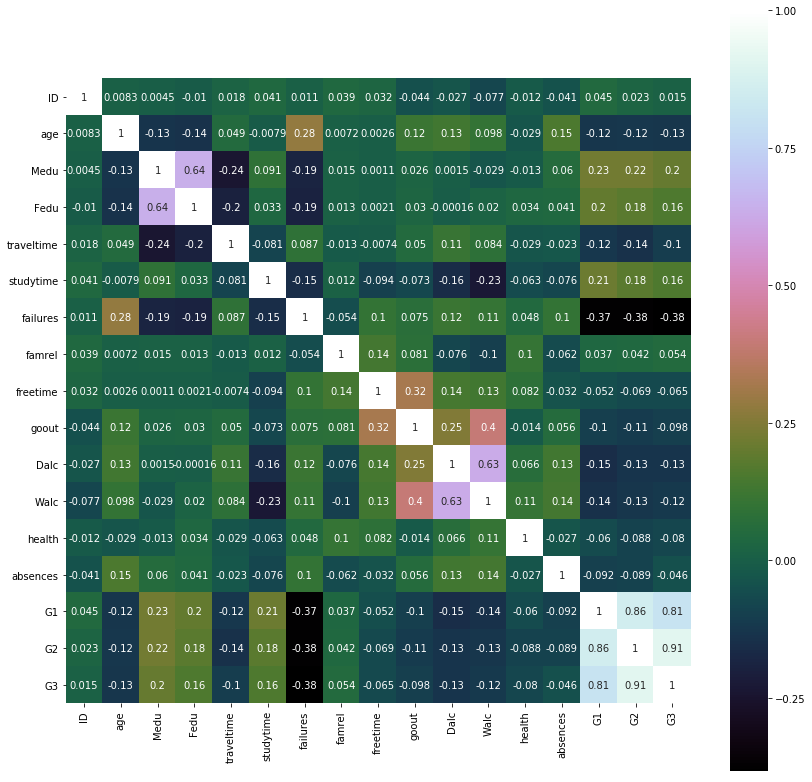

In [145]:
plt.figure(figsize = (14, 14))
numbers_cor = data.describe().columns
sns.heatmap(data[numbers_cor].corr(), vmax = 1, square = True, annot = True, cmap = 'cubehelix')

In [146]:
del data['Walc'] # Силъная корреляция с употреблением алкоголя в будние
del data['goout'] # Силъная корреляция с употреблением алкоголя
del data['Fedu'] # Силъная корреляция с образованием матери 
del data['health'] # Незначителъная связъ с оценками
del data['absences'] # Незначителъная связъ с оценками
del data['famrel'] # Незначителъная связъ с оценками
del data['ID']

C:\Users\marte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


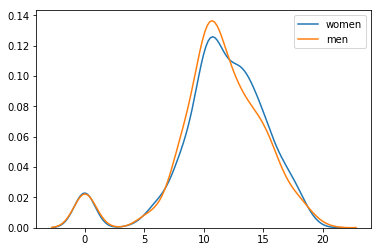

In [147]:
data_f = data[data['sex'] == 'F']
data_m = data[data['sex'] == 'M']

sns.kdeplot(data_f['G3'], label='women', shade=False)
sns.kdeplot(data_m['G3'], label='men', shade=False)

In [148]:
#Распределение мужчин и жещин по оценкам примерно одинаковое, соответственно:
del data['sex']

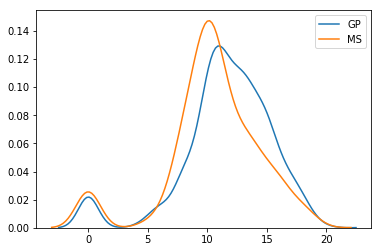

In [149]:
data_gp = data[data['school'] == 'GP']
data_ms = data[data['school'] == 'MS']

sns.kdeplot(data_gp['G3'], label='GP', shade=False)
sns.kdeplot(data_ms['G3'], label='MS', shade=False)

In [150]:
new_sch = []
for i in data['school']:
    if i == 'GP':
        new_sch.append(1)
    else:
        new_sch.append(0)
data['school'] = new_sch

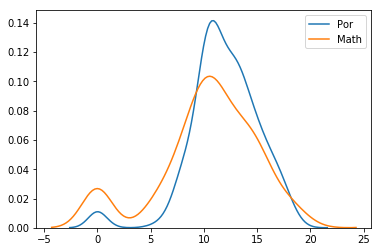

In [151]:
data_po = data[data['Subject'] == 'Por']
data_ma = data[data['Subject'] == 'Math']

sns.kdeplot(data_po['G3'], label='Por', shade=False)
sns.kdeplot(data_ma['G3'], label='Math', shade=False)

In [152]:
new_sub = []
for i in data['Subject']:
    if i == 'Por':
        new_sub.append(1)
    else:
        new_sub.append(0)
data['Subject'] = new_sub

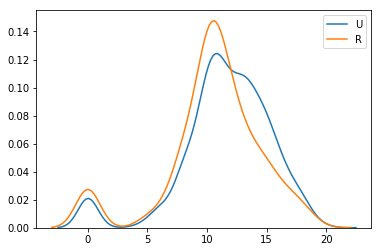

In [153]:
data_u = data[data['address'] == 'U']
data_r = data[data['address'] == 'R']

sns.kdeplot(data_u['G3'], label='U', shade=False)
sns.kdeplot(data_r['G3'], label='R', shade=False)

In [154]:
new_addr = []
for i in data['address']:
    if i == 'U':
        new_addr.append(1)
    else:
        new_addr.append(0)
data['address'] = new_addr

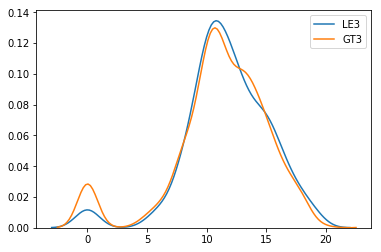

In [155]:
data_l = data[data['famsize'] == 'LE3']
data_g = data[data['famsize'] == 'GT3']

sns.kdeplot(data_l['G3'], label='LE3', shade=False)
sns.kdeplot(data_g['G3'], label='GT3', shade=False)

In [156]:
#Выглядят почти идентично:
del data['famsize']

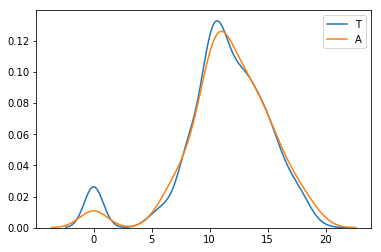

In [157]:
data_l = data[data['Pstatus'] == 'T']
data_g = data[data['Pstatus'] == 'A']

sns.kdeplot(data_l['G3'], label='T', shade=False)
sns.kdeplot(data_g['G3'], label='A', shade=False)

In [158]:
#Выглядят почти идентично:
del data['Pstatus']

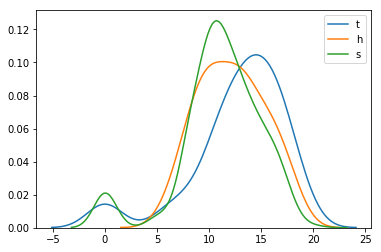

In [159]:
data_l = data[data['Fjob'] == 'teacher']
data_g = data[data['Fjob'] == 'health']
data_g1 = data[data['Fjob'] == 'services']

sns.kdeplot(data_l['G3'], label='t', shade=False)
sns.kdeplot(data_g['G3'], label='h', shade=False)
sns.kdeplot(data_g1['G3'], label='s', shade=False)

In [160]:
#Можно расставитъ  от "плохого к хорошему"
new_fj = []
for i in data['Fjob']:
    if i == 'teacher':
        new_fj.append(0)
    elif i == 'health':
        new_fj.append(1)
    else:
        new_fj.append(2)
data['Fjob'] = new_addr

In [161]:
del data['Mjob'] #Высокая корреляция с работой отца

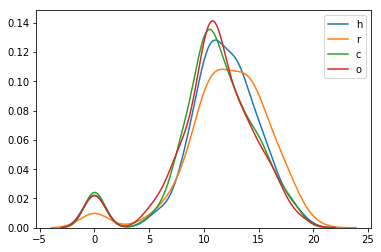

In [162]:
data_l = data[data['reason'] == 'home']
data_g = data[data['reason'] == 'reputation']
data_g1 = data[data['reason'] == 'course']
data_g11 = data[data['reason'] == 'other']

sns.kdeplot(data_l['G3'], label='h', shade=False)
sns.kdeplot(data_g['G3'], label='r', shade=False)
sns.kdeplot(data_g1['G3'], label='c', shade=False)
sns.kdeplot(data_g11['G3'], label='o', shade=False)

In [163]:
new_r = []
for i in data['reason']:
    if i == 'home':
        new_r.append(1)
    elif i == 'reputation':
        new_r.append(0)
    else:
        new_r.append(2)
data['reason'] = new_r

In [164]:
new_fs = []
for i in data['famsup']:
    if i == 'yes':
        new_fs.append(1)
    else:
        new_fs.append(0)
data['famsup'] = new_fs

In [165]:
del data['schoolsup'] #Никому не помогают

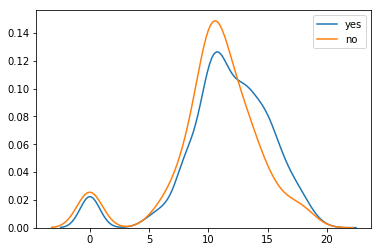

In [166]:
data_l = data[data['internet'] == 'yes']
data_g = data[data['internet'] == 'no']

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

In [167]:
new_i = []
for i in data['internet']:
    if i == 'yes':
        new_i.append(1)
    else:
        new_i.append(0)
data['internet'] = new_i

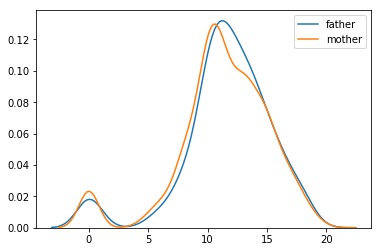

In [168]:
data_l = data[data['guardian'] == 'father']
data_g = data[data['guardian'] == 'mother']

sns.kdeplot(data_l['G3'], label='father', shade=False)
sns.kdeplot(data_g['G3'], label='mother', shade=False)

In [169]:
#Признак малозначимый
del data['guardian']

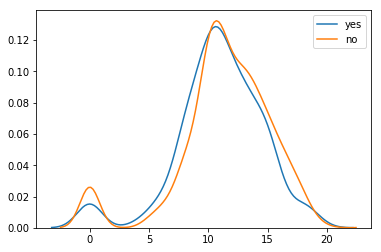

In [170]:
data_l = data[data['paid'] == 'yes']
data_g = data[data['paid'] == 'no']

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

In [171]:
#Признак малозначимый
del data['paid']

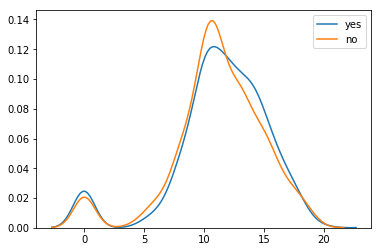

In [172]:
data_l = data[data['activities'] == 'yes']
data_g = data[data['activities'] == 'no']

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

In [173]:
new_a = []
for i in data['activities']:
    if i == 'yes':
        new_a.append(1)
    else:
        new_a.append(0)
data['activities'] = new_a

In [174]:
new_i = []
for i in data['nursery']:
    if i == 'yes':
        new_i.append(1)
    else:
        new_i.append(0)
data['nursery'] = new_i

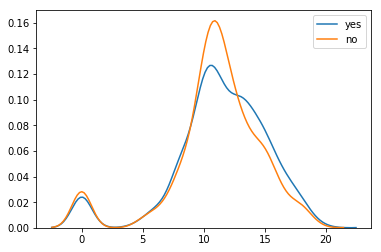

In [175]:
data_l = data[data['nursery'] == 1]
data_g = data[data['nursery'] == 0]

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

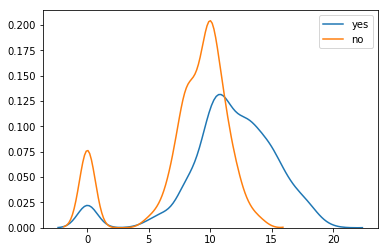

In [176]:
data_l = data[data['higher'] == 'yes']
data_g = data[data['higher'] == 'no']

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

In [177]:
new_i = []
for i in data['higher']:
    if i == 'yes':
        new_i.append(1)
    else:
        new_i.append(0)
data['higher'] = new_i

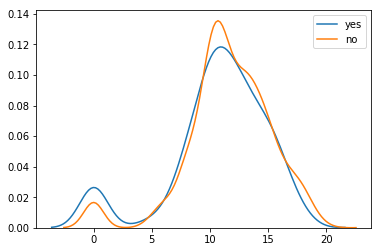

In [178]:
data_l = data[data['romantic'] == 'yes']
data_g = data[data['romantic'] == 'no']

sns.kdeplot(data_l['G3'], label='yes', shade=False)
sns.kdeplot(data_g['G3'], label='no', shade=False)

In [179]:
new_i = []
for i in data['romantic']:
    if i == 'yes':
        new_i.append(1)
    else:
        new_i.append(0)
data['romantic'] = new_i

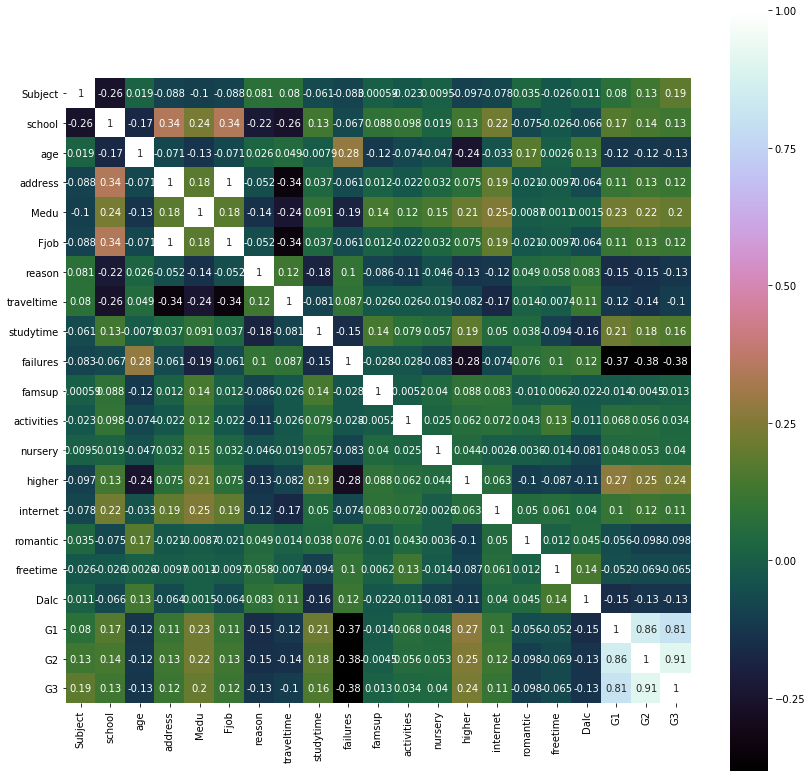

In [180]:
plt.figure(figsize = (14, 14))
numbers_cor = data.describe().columns
sns.heatmap(data[numbers_cor].corr(), vmax = 1, square = True, annot = True, cmap = 'cubehelix')

In [181]:
# #Удаляем малозначимые признаки
# del data['famsup']
# del data['activities']
# del data['nursery']
# del data['freetime']

In [182]:
data.head(10)

,Subject,school,age,address,Medu,Fjob,reason,traveltime,studytime,failures,famsup,activities,nursery,higher,internet,romantic,freetime,Dalc,G1,G2,G3
0,1,1,16,1,3,1,2,1,1,0,0,0,1,1,1,0,2,1,15,13,14
1,1,1,17,1,3,1,2,1,2,0,0,1,0,1,1,0,3,1,17,18,17
2,1,1,16,1,1,1,2,2,1,2,0,0,0,1,1,0,4,3,9,8,10
3,1,0,17,1,2,1,1,2,2,0,0,1,1,1,1,0,4,1,14,15,16
4,1,1,16,1,1,1,1,2,1,0,1,0,1,1,0,0,3,1,12,13,13
5,1,1,18,1,3,1,2,2,1,0,0,1,1,1,1,1,3,4,11,11,12
6,1,0,18,1,1,1,2,2,2,0,0,1,1,1,0,0,1,1,11,12,9
7,1,0,15,0,4,0,2,2,1,0,0,0,1,1,1,1,5,3,13,14,14
8,0,1,15,1,3,1,0,1,2,0,1,0,1,1,1,0,4,1,7,6,6
9,1,0,16,0,3,0,2,3,2,0,0,0,0,1,0,0,4,1,9,10,11


Частъ 2

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [223]:
cols = ['Subject', 'school', 'age', 'address', 'Medu', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'higher',
       'internet', 'Dalc', 'famsup', 'activities', 'nursery', 'freetime', 'G1']
x = data[cols]
y = data['G3']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 2100)

In [258]:
#Линейная регрессия с учетом G1 

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

среднеквадратичное отклонение 5.392082073591781
Коэффициент детерминации: 0.63260808997993
Average CV: 0.6691746892324654


Ридж регрессия с G1

In [241]:
# Подбираем параметры

k = [0.1, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 60, 100, 200, 500]
params = {'alpha': k, 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
model = Ridge()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='saga', tol=0.001)

In [257]:
model = Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 5.274110737734523
Коэффициент детерминации: 0.6406461194121019
Average CV: 0.6709107247660788


Лассо регрессия с G1

In [234]:
# Подбираем параметры

params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
model = Lasso()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)

clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [256]:
model = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 5.110420220012952
Коэффициент детерминации: 0.6517992456325717
Average CV: 0.6748669193528004


KNN c G1

In [250]:
# Подбираем параметры

params = {'n_neighbors': range(1, 100), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsRegressor()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)

clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=28, p=2,
          weights='uniform')

In [254]:
model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=28, p=2,
          weights='uniform')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 5.219617444679021
Коэффициент детерминации: 0.6443590441683841
Average CV: 0.6439236552791023


Модели без учета G1

In [259]:
cols = ['Subject', 'school', 'age', 'address', 'Medu', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'higher',
       'internet', 'Dalc', 'famsup', 'activities', 'nursery', 'freetime']
x = data[cols]
y = data['G3']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

In [ ]:
Линейная без G1

In [260]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

среднеквадратичное отклонение 10.97675205106668
Коэффициент детерминации: 0.25597873203923416
Average CV: 0.18839340213350672


In [ ]:
Ридж без G1

In [261]:
# Подбираем параметры

k = [0.1, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 60, 100, 200, 500]
params = {'alpha': k, 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
model = Ridge()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sparse_cg', tol=0.001)

In [262]:
model = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sparse_cg', tol=0.001)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 11.059542237008234
Коэффициент детерминации: 0.25036708491152515
Average CV: 0.1919947749185607


In [ ]:
Лассо регрессия без G1

In [263]:
# Подбираем параметры

params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
model = Lasso()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)

clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [264]:
model = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 11.359997305397524
Коэффициент детерминации: 0.23000177467146055
Average CV: 0.18767473495832848


In [ ]:
KNN без G1

In [265]:
# Подбираем параметры

params = {'n_neighbors': range(1, 100), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsRegressor()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)

clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

In [267]:
model = KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

error = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('Среднеквадратичное отклонение', mse)
print('Коэффициент детерминации:', error)

#Кросс-валидация
scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

Среднеквадратичное отклонение 12.594946328488648
Коэффициент детерминации: 0.1462950157183075
Average CV: 0.18635798192841088


Можно сделатъ вывод, что, если учитыватъ G1, то с незначиталъным отрывом во всех метриках лучше себя проявляет Лассо регрессия, в ином случае - Ридж регрессия.

Частъ 3
Классификация

Бинарная классификация

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, accuracy_score, classification_report

In [272]:
cols = ['G1', 'G2', 'G3']
X = data.drop(cols, axis=1)
y = data['G3'][:]
y = pd.Series(list(map(lambda x: 1 if x >= 8 else -1, y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [ ]:
KNN

In [275]:
#Подбираем параметры

params = {'n_neighbors': range(1,100), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [277]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

model.score(X_test, Y_test)

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='f1')
print('Average CV:', scores.mean())

Average CV: 0.9488620102714063


Логистическая регрессия

In [284]:
#Подберем оптималъные параметры

params = {'C': range(1,5), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model = LogisticRegression()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)

clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reac

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [285]:
model = LogisticRegression(C=2, solver='saga')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(Y_test, y_pred)

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Average value on cross-validation: 0.9498067451783291


C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Решающие деревъя

In [288]:
params = {'min_samples_split': range(2, 100), 'max_depth': range(2,100), 'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [289]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2 , min_samples_split=2)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='f1')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9491336785794857


In [ ]:
В итоге лучшими моделями оказалисъ логистическая регрессия и, с неболъшим оставанием, решающие деревъя 

Многоклассовая классификация

In [290]:
data.head(10)

,Subject,school,age,address,Medu,Fjob,reason,traveltime,studytime,failures,famsup,activities,nursery,higher,internet,romantic,freetime,Dalc,G1,G2,G3,Walc,goout,Fedu,health,absences,famrel
0,1,1,16,1,3,1,2,1,1,0,0,0,1,1,1,0,2,1,15,13,14,4,1,4,5,12,3
1,1,1,17,1,3,1,2,1,2,0,0,1,0,1,1,0,3,1,17,18,17,3,4,2,3,2,5
2,1,1,16,1,1,1,2,2,1,2,0,0,0,1,1,0,4,3,9,8,10,5,5,2,5,0,4
3,1,0,17,1,2,1,1,2,2,0,0,1,1,1,1,0,4,1,14,15,16,1,3,3,3,4,4
4,1,1,16,1,1,1,1,2,1,0,1,0,1,1,0,0,3,1,12,13,13,4,2,1,5,2,4
5,1,1,18,1,3,1,2,2,1,0,0,1,1,1,1,1,3,4,11,11,12,5,4,1,4,2,3
6,1,0,18,1,1,1,2,2,2,0,0,1,1,1,0,0,1,1,11,12,9,1,1,1,5,6,1
7,1,0,15,0,4,0,2,2,1,0,0,0,1,1,1,1,5,3,13,14,14,5,1,4,5,0,1
8,0,1,15,1,3,1,0,1,2,0,1,0,1,1,1,0,4,1,7,6,6,1,4,2,5,10,4
9,1,0,16,0,3,0,2,3,2,0,0,0,0,1,0,0,4,1,9,10,11,2,5,4,5,4,3


In [292]:
#Добавляем 4-х балъную шкалу

four_s = []
for i in data['G3']:
    if 18 <= i <= 20:
        four_s.append(4)
    elif 14 <= i <= 17:
        four_s.append(3)
    elif 8 <= i <= 13:
        four_s.append(2)
    else:
        four_s.append(1)
data['four_s'] = four_s

0    3
1    3
2    2
3    3
4    2
5    2
6    2
7    3
8    1
9    2
Name: four_s, dtype: int64

In [293]:
cols = ['G1', 'G2', 'G3']
X = data.drop(cols, axis=1)
y = data['four_s'][:]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [294]:
params = {'n_neighbors': range(1, 20), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
model = KNeighborsClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [296]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

model.score(X_test, Y_test)

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='accuracy')
print('Average CV:', scores.mean())

Average CV: 0.6931260061889659


Решающие деревъя

In [297]:
params = {'min_samples_split': range(2,40), 'max_depth': range(2,20), 'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, Y_train)
clf.best_estimator_

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [300]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 1.0


In [ ]:
Логистическая регрессия

In [ ]:
Код ниже за решетками потому, что при запуске все будет красное, но выдал он это:

LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# params = {'C': range(1,10), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# model = LogisticRegression()
# clf = GridSearchCV(model, params)
# clf.fit(X_train, Y_train)
# clf.best_estimator_

In [303]:
model = LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

classification_report(Y_test, y_pred)

scores = cross_val_score(model, X_train, Y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation:',scores.mean())

Average value on cross-validation: 0.9465744427199316


C:\Users\marte\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\

Дервеъя показали себя лучшими с резулътатом в 1